<a href="https://colab.research.google.com/github/chhak2021/Colab/blob/main/4_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
"""
날짜 : 2021/07/12
이름 : 김철학
내용 : 텐서플로 MNIST 딥러닝 실습하기
"""
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
from google.colab import drive
tf.__version__

'2.5.0'

In [30]:
#학습데이터 불러오기
(mnist_train_data, mnist_train_label), (mnist_test_data, mnist_test_label) = load_data()

In [31]:
#데이터확인
print(mnist_train_data.shape, mnist_train_label.shape)
print(mnist_test_data.shape, mnist_test_label.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


[ 4251  8035 41050  9900 44356]


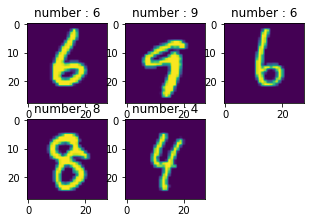

In [32]:
#샘플 이미지 출력
random_idx = np.random.randint(60000, size=5)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  label = mnist_train_label[idx]
  plt.imshow(mnist_train_data[idx, :])
  plt.title('number : %d' % label)

In [33]:
#학습을 위한 데이터 전처리(정규화)
mnist_train_data = mnist_train_data / 255
mnist_test_data = mnist_test_data / 255

#라벨 원핫코딩
mnist_train_label = to_categorical(mnist_train_label)
mnist_test_label = to_categorical(mnist_test_label)

In [58]:
#학습모델 설계
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [59]:
#학습모델 설정
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [60]:
#학습하기
model.fit(mnist_train_data, mnist_train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3004 - acc: 0.9144
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1333 - acc: 0.9605
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0968 - acc: 0.9710
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0759 - acc: 0.9768
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0638 - acc: 0.9798
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0523 - acc: 0.9838
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0454 - acc: 0.9852
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0390 - acc: 0.9870
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0345 - acc: 0.9888
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0298 - acc: 0.9901


In [61]:
#평가하기
model.evaluate(mnist_test_data, mnist_test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.0992 - acc: 0.9728


[0.0991632416844368, 0.9728000164031982]

In [68]:
#테스트하기
result = model.predict(mnist_test_data)
score = accuracy_score(result.round(), mnist_test_label)
print('score :', score)

for i in range(20):
  print('-------------------------------------')
  print('결과 :', result[i].round())
  print('정답 :', mnist_test_label[i])

score : 0.9724
-------------------------------------
결과 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
정답 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
-------------------------------------
결과 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
-------------------------------------
결과 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------------------
결과 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------------------
결과 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
정답 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
-------------------------------------
결과 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
-------------------------------------
결과 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
정답 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
-------------------------------------
결과 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
정답 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
-------------------------------------
결과 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
정답 : [0. 0. 0.

In [ ]:
#이미지 출력
plt.imshow(mnist_test_data[18].reshape(28, 28))

In [69]:
#새로운 이미지 불러오기
img_num1 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num1.jpg')
img_num2 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num2.jpg')
img_num3 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num3.jpg')
img_num4 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num4.jpg')
img_num5 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num5.jpg')

In [72]:
#이미지 파일의 픽셀 데이터 변환
px_img_num1 = np.array(img_num1)
px_img_num2 = np.array(img_num2)
px_img_num3 = np.array(img_num3)
px_img_num4 = np.array(img_num4)
px_img_num5 = np.array(img_num5)

In [78]:
#새로운 이미지 인식여부 확인
img_arr = np.array([px_img_num1, px_img_num2, px_img_num3, px_img_num4, px_img_num5])
img_arr = img_arr / 255

result = model.predict(img_arr)
print(result.round())

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
####################################################################
# MNIST 두번째 타입 예제

In [ ]:
#데이터 불러오기
df_mnist_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_train.csv', header=None)
df_mnist_test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_test.csv', header=None)

mnist_train_data  = df_mnist_train.iloc[:10000, 1:] / 255
mnist_train_label = df_mnist_train.iloc[:10000, 0]

mnist_test_data  = df_mnist_test.iloc[:, 1:] / 255
mnist_test_label = df_mnist_test.iloc[:, 0]

mnist_train_label[2]

In [ ]:
#데이터 라벨을 원-핫 인코딩으로 변환
train_label_cate = to_categorical(mnist_train_label)
test_label_cate  = to_categorical(mnist_test_label)
train_label_cate[2]

In [ ]:
#학습모델 설계
model = Sequential()
model.add(Dense(units=784, input_dim=784, activation='sigmoid'))
model.add(Dense(units=10, activation='sigmoid'))

In [ ]:
#학습모델 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
#학습하기
model.fit(mnist_train_data, train_label_cate, epochs=100)

In [ ]:
#검증하기
result = model.evaluate(mnist_test_data, test_label_cate)
result